In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
##Quadratic equation used as dataset
X = 6*np.random.rand(100,1)-3
Y = 0.5*X**2+1.5*X+2+np.random.rand(100,1)
#Quadratic equation 0.5*X**2+1.5*X+2+outliers

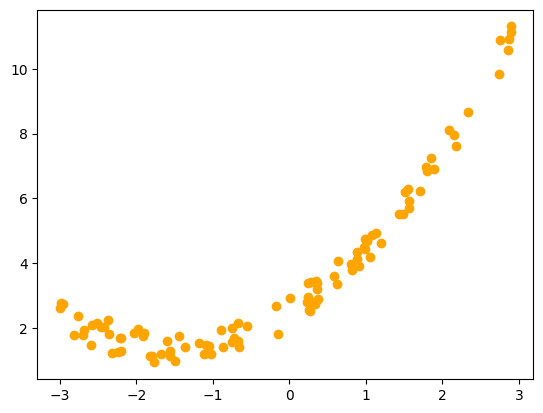

In [3]:
plt.scatter(X,Y,c=['orange'])
plt.show()

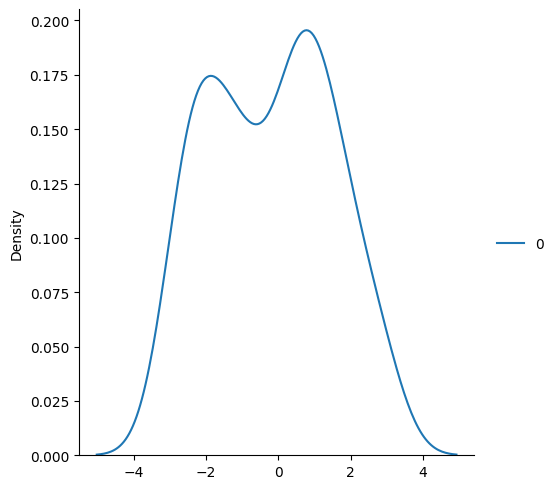

In [4]:
sns.displot(X,kind='kde')

In [5]:
##train test split 
from sklearn.model_selection import train_test_split
X_train, x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
x_test = scalar.transform(x_test)
X_train

array([[-1.42275553],
       [ 0.28227113],
       [-1.04297478],
       [ 0.28494033],
       [ 0.79745242],
       [ 1.7239313 ],
       [-1.22974185],
       [-1.23749986],
       [ 1.81649502],
       [-0.50757231],
       [-0.49640931],
       [ 0.34470073],
       [-0.72624636],
       [-1.13929798],
       [ 1.23391758],
       [ 0.7456416 ],
       [-0.25062002],
       [-1.20930985],
       [-0.91923513],
       [-1.36683102],
       [ 0.03794572],
       [ 0.29920403],
       [-0.29507218],
       [ 0.50277109],
       [-1.14032435],
       [-0.45984176],
       [ 0.66597899],
       [ 1.17734094],
       [ 1.39828647],
       [-1.35925734],
       [-0.79273802],
       [ 0.97238085],
       [ 0.35221254],
       [ 1.79556363],
       [ 1.17782585],
       [ 0.47700975],
       [-0.90074489],
       [ 0.76340245],
       [ 1.38515952],
       [ 0.72780537],
       [ 0.6130028 ],
       [ 0.14267058],
       [-0.47182523],
       [ 0.34037741],
       [ 0.33143283],
       [-1

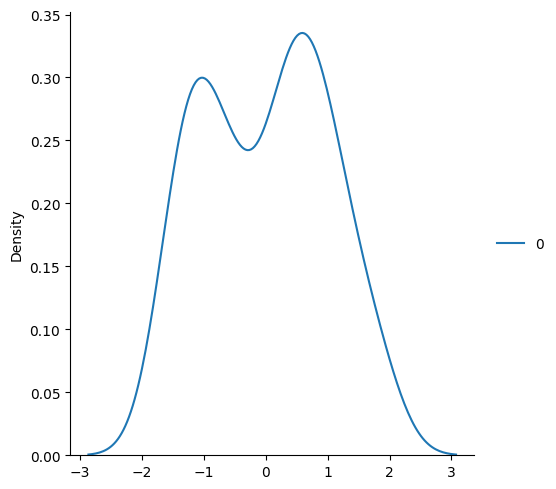

In [7]:
sns.displot(X_train, kind='kde')

In [8]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression.predict(x_test))
print(score)

0.7403484985037279


In [10]:
adusted_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1])
print(adusted_r2)

0.7403484985037279


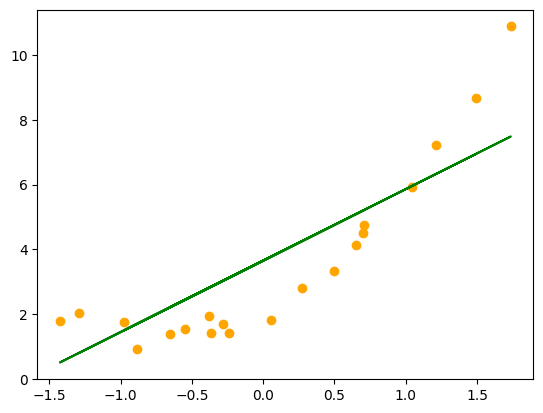

In [11]:
plt.scatter(x_test, y_test, c = ['orange'])
plt.plot(x_test, regression.predict(x_test), color='green')

In [12]:
print(len(X_train))
print(len(Y_train))

80
80


In [14]:
## Let's apply polynomial regeression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(x_test)
X_train_poly

array([[ 1.00000000e+00, -1.42275553e+00,  2.02423328e+00],
       [ 1.00000000e+00,  2.82271129e-01,  7.96769903e-02],
       [ 1.00000000e+00, -1.04297478e+00,  1.08779640e+00],
       [ 1.00000000e+00,  2.84940331e-01,  8.11909925e-02],
       [ 1.00000000e+00,  7.97452420e-01,  6.35930363e-01],
       [ 1.00000000e+00,  1.72393130e+00,  2.97193913e+00],
       [ 1.00000000e+00, -1.22974185e+00,  1.51226501e+00],
       [ 1.00000000e+00, -1.23749986e+00,  1.53140590e+00],
       [ 1.00000000e+00,  1.81649502e+00,  3.29965416e+00],
       [ 1.00000000e+00, -5.07572305e-01,  2.57629645e-01],
       [ 1.00000000e+00, -4.96409315e-01,  2.46422208e-01],
       [ 1.00000000e+00,  3.44700733e-01,  1.18818596e-01],
       [ 1.00000000e+00, -7.26246361e-01,  5.27433776e-01],
       [ 1.00000000e+00, -1.13929798e+00,  1.29799990e+00],
       [ 1.00000000e+00,  1.23391758e+00,  1.52255259e+00],
       [ 1.00000000e+00,  7.45641596e-01,  5.55981390e-01],
       [ 1.00000000e+00, -2.50620018e-01

In [21]:
regression = LinearRegression()
regression.fit(X_train_poly,Y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(f"{score*100:.1f}%")

98.9%


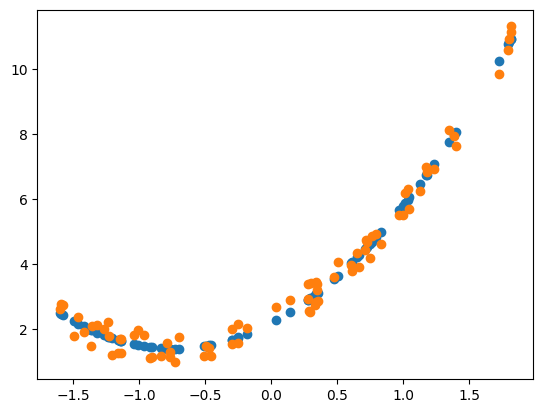

In [18]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, Y_train)

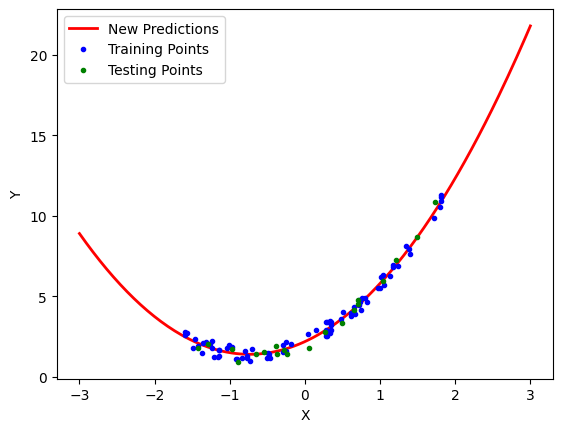

In [23]:
##Predictions for new data set
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label="New Predictions")
plt.plot(X_train,Y_train,'b.',label='Training Points')
plt.plot(x_test,y_test,'g.',label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Pipeline

In [27]:
from sklearn.pipeline import Pipeline

In [68]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias = True)
    lin_reg = LinearRegression(n_jobs=-1)
    poly_regression = Pipeline([
        ('polynomial',poly_features),
        ('regressor',lin_reg)
    ])
    poly_regression.fit(X_train, Y_train)
    y_new = poly_regression.predict(X_new)
    y_pred = poly_regression.predict(x_test)
    plt.plot(X_new, y_new,'r',linewidth = 2, label = "Predicts at Degree="+str(degree))
    plt.plot(X_train, Y_train, 'b.',linewidth = 3, label = "Train Data")
    plt.plot(x_test, y_test,'g.',linewidth = 3, label = "Test Data")
    plt.legend(loc = "upper right")
    plt.axis([-4,4,0,20])
    plt.xlabel('X')
    plt.ylabel('Y')
    score = r2_score(y_test, y_pred)
    print(f"{score*100}%")
    plt.show()

98.93712787382124%


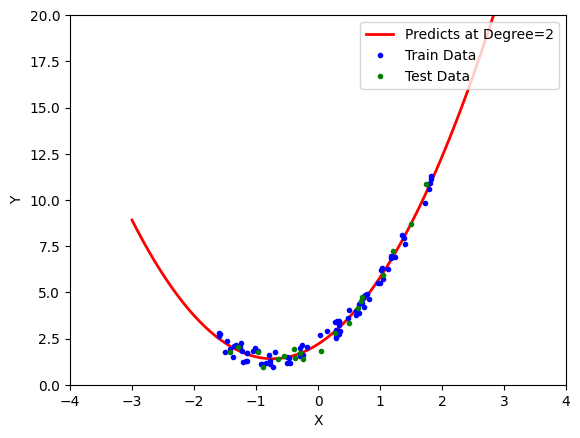

In [75]:
poly_regression(2)